# 3. Visual exploratory data analysis
**Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.**

In [1]:
import pandas as pd
ri = pd.read_csv('police.csv')

ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

ri.set_index('stop_datetime', inplace=True)

## Does time of day affect arrest rate?
In this chapter, you'll explore and analyze the dataset visually using plots.

### Analyzing datetime data
In chapter 1, we worked with a small DataFrame of Apple stock prices. We're going to use it here again, but this time it includes two days each from the first three months of 2018. There's also a new column, volume, that displays the number of Apple shares traded that day.
```python
apple
```
```
    price    volume        date_and_time
0  174.35  20567800  2018-01-08 16:00:00
1  174.33  21584000  2018-01-09 16:00:00
2  155.15  54390500  2018-02-08 16:00:00
3  156.41  70672600  2018-02-09 16:00:00
4  176.94  23774100  2018-03-08 16:00:00
5  179.98  32185200  2018-03-09 16:00:00
```

### Accessing datetime attributes (1)
You might recall that we converted the `date_and_time` column to pandas datetime format. 
```python
apple.dtypes
```
```
price                  float64
volume                   int64
date_and_time   datetime64[ns]
```
Because of datetime format, you actually have access to special date-based attributes via the dt accessor. 

For example, you can access the month as an integer by using the `dt.month` attribute. There are many other similar attributes available, such as week, dayofweek, hour, minute, and so on.
```python
apple.date_and_time.dt.month
```
```
0   1
1   1
2   2
3   2
...
```

### Accessing datetime attributes (2)
Similar to our traffic stops dataset, we can set the `date_and_time` column as the DataFrame index. Because of its data type, it is now a DatetimeIndex. 
```python
apple.set_index('date_and__time', inplace=True)
apple.index
```
```
DatetimeIndex(['2018-01-08 16:00:00', '2018-01-09 16:00:00', 
               '2018-02-08 16:00:00', '2018-02-09 16:00:00', 
               '2018-03-08 16:00:00', '2018-03-09 16:00:00'], 
             dtype='datetime64[ns]', name='date_and_time', freq=None)
```

We can still access the same datetime attributes, such as month, and we get the same result as before, but we no longer have to use the `dt` accessor.
```python
apple.index.month
```
```
Int64Index([1, 1, 2, 2, 3, 3], dtype='int64', name='date_and_time')
```

### Calculating the monthly mean price
Let's examine the price column of the apple DataFrame. If we wanted to calculate the mean price for all rows, we would simply use the `mean()` method. 
```python
apple.price.mean()
```
```
169.52666666666667
```

But what if we wanted to calculate the mean price for each month? One idea would be to use a `groupby()` operation, but we can't group by month as a string since it's not a column in the DataFrame. 

Instead, we would group by `apple.index.month`, and then take the `mean()` of the price column.
```python
apple.groupby(apple.index.month).price.mean()
```
```
date_and_time
1   174.34
2   155.78
3   178.46
Name: price, dtype: float64
```

This operation outputs a Series, in which the index is the month number and the values are the mean prices. We'll go ahead and save this Series as an object called `monthly_price`.

```python
monthly_price = apple.groupby(apple.index.month).price.mean()
```

### Plotting the monthly mean price
Let's say that we wanted to plot this data in order to visually examine the monthly price trends. 

We would start by importing `matplotlib.pyplot as plt`. 
```python
import matplotlib.pyplot as plt
```

Then, we call the `plot()` method on the `monthly_price` Series. The default plot for a Series is a line plot, which uses the Series index on the x-axis and the Series values on the y-axis. Finally, we'll label the axes and provide a title for the plot, and then use the `show()` function to display the plot.

```python
monthly_price.plot()

plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Monthly mean stock price for Apple')

plt.show()
```

### Line plot
It would be very simple plot in this case, but you can imagine that with a much larger dataset, this plot could help you to understand the price trends in a way that examining the raw data could not.

## Calculating the hourly arrest rate
When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops in the `ri` DataFrame. Then, you'll calculate the hourly arrest rate by using the `hour` attribute of the index. The `hour` ranges from 0 to 23, in which:

    0 = midnight
    12 = noon
    23 = 11 PM

- Take the mean of the `is_arrested` column to calculate the overall arrest rate.

In [2]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

0.0355690117407784


- Group by the `hour` attribute of the DataFrame index to calculate the hourly arrest rate.
- Save the hourly arrest rate Series as a new object, `hourly_arrest_rate`.

In [3]:
# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


## Plotting the hourly arrest rate
In this exercise, you'll create a line plot from the `hourly_arrest_rate` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers.

- Import `matplotlib.pyplot` using the alias `plt`.
- Create a line plot of `hourly_arrest_rate` using the `.plot()` method.
- Label the x-axis as `'Hour'`, label the y-axis as `'Arrest Rate'`, and title the plot `'Arrest Rate by Time of Day'`.
- Display the plot using the `.show()` function.

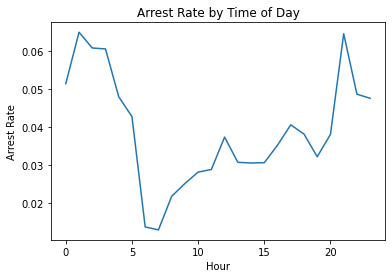

In [4]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

*The arrest rate has a significant spike overnight, and then dips in the early morning hours.*

## Are drug-related stops on the rise?
In this section, we'll use subplots to help us examine the relationship between two variables over time.

###  Resampling the price
Let's return to our DataFrame of Apple stock prices. We calculated the mean price for each month using a `groupby()` operation. 
```python
apple.groupby(apple.index.month).price.mean()
```
```
date_and_time
1   174.34
2   155.78
3   178.46
```

There's actually an alternative method, known as resampling, that we can use to accomplish the same task. 

Resampling is when you change the frequency of your time series observations. In this case, we'll resample the price column by month, represented by the capital letter M, and then chain the `mean()` method onto the end. 
```python
apple.price.resample('M').mean()
```
```
date_and_time
2018-01-31   174.34
2018-02-28   155.78
2018-03-31   178.46
...
```

The output is identical to the `groupby()` operation, except that the index consists of the last day of each month, rather than just the integers 1, 2, and 3.

### Resampling the volume
As a reminder, the apple DataFrame also has a volume column that displays the number of Apple shares traded that day. 
```python
apple
```
```
date_and_time         price    volume
2018-01-08 16:00:00  174.34  20567800
2018-01-09 16:00:00  155.78  21584000
2018-02-08 16:00:00  178.46  54390500
...
```

Let's resample that column, to calculate the mean daily volume for each month. 

```python
apple.volume.resample('M').mean()
```
```
date_and_time
2018-01-31   21075900
2018-02-28   62531550
2018-03-31   27979650
...
```

One thing worth noticing is that the output has the same index as the last resampling operation, since both price and volume were resampled at the same frequency.

### Concatenating price and volume
Now that we've resampled both the price and volume data, we're going to combine the results into a single DataFrame so that we can study the relationship between price and volume. 

First, we'll save the two resampled Series as separate objects. One is called `monthly_price` and the other is called `monthly_volume`. 
```python
monthly_price = apple.price.resample('M').mean()
monthly_volume = apple.volume.resample('M').mean()
```

Then, we'll combine these two objects using the `concat()` function, which concatenates pandas objects along a specified axis. In this case, we want them to be combined along the `columns` axis, meaning that we want them side-by-side. 
```python
pd.concat([monthly_price, monthly_volume], axis='columns')
```
```
date_and_time   price    volume
2018-01-31     174.34  21075900
2018-02-28     155.78  62531550
2018-03-31     178.46  27979650
...
```

Notice that they aligned along their shared index. We'll save this new DataFrame as an object called `monthly`.
```python
monthly = pd.concat([monthly_price, monthly_volume], axis='columns')
```

### Plotting price and volume (1)
To visualize the relationship between price and volume, we simply call the `plot()` method on the monthly DataFrame. 
```python
monthly.plot()
plt.show()
```

`pandas` outputs a single line plot in which each line represents one of the two columns. Because it's a single plot, the two lines are sharing both the x and y axes. It makes sense for the x-axis to be shared, since we want to compare price and volume by month. But sharing the y-axis is problematic, because price and volume are on such different scales: price is in the hundreds, and volume is in the tens of millions, represented by the 1e7 notation at the top of the y-axis. Because of the different scales, we can't actually see the price trend.

### Plotting price and volume (2)
The solution to this problem is to set the subplots parameter to True, which results in two separate plots with independent y axes. 
```python
monthly.plot(subplots=True)
plt.show()
```
Now we can clearly see the monthly trends for both price and volume. They appear to have an inverse relationship, though we wouldn't actually draw that conclusion without having a lot more data.

## Plotting drug-related stops
In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column `drugs_related_stop` indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.

- Calculate the annual rate of drug-related stops by resampling the `drugs_related_stop` column (on the `'A'` frequency) and taking the mean.
- Save the annual drug rate Series as a new object, `annual_drug_rate`.

In [5]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


- Create a line plot of `annual_drug_rate` using the `.plot()` method.
- Display the plot using the `.show()` function.

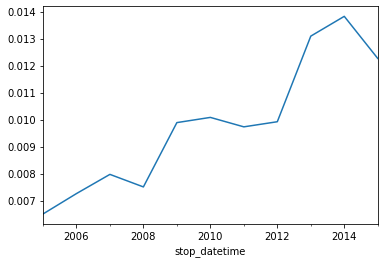

In [6]:
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

*The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?*

## Comparing drug and search rates
As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

- Calculate the annual search rate by resampling the `search_conducted` column, and save the result as `annual_search_rate`.
- Concatenate `annual_drug_rate` and `annual_search_rate` along the columns axis, and save the result as `annual`.
- Create subplots of the drug and search rates from the `annual` DataFrame.
- Display the subplots.

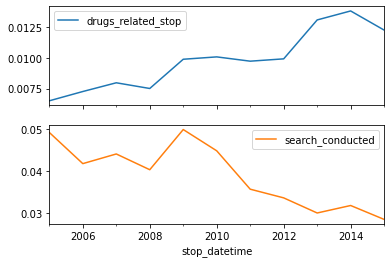

In [7]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

*The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.*

---
## What violations are caught in each district?
Now, we're going to make different types of plots from DataFrames.

### Computing a frequency table
One pandas function that might be new to you is `crosstab()`, short for cross-tabulation. To use `crosstab()`, you pass it two pandas Series that represent categories, and it outputs a frequency table in the form of a DataFrame. You can think of a frequency table as a tally of how many times each combination of values occurs in the dataset. In this case, we passed `driver_race` and `driver_gender` to `crosstab()`, and it tells us how many rows contain each combination of race and gender. 

In [8]:
pd.crosstab(ri.driver_race, ri.driver_gender)

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


For example, 551 Asian female drivers were stopped, which you can verify by filtering the DataFrame and checking the shape. 

In [9]:
ri[(ri.driver_race == 'Asian') & (ri.driver_gender == 'F')].shape

(551, 13)

Notice that race is along the index of the DataFrame and gender is along the columns, though you could transpose the DataFrame by reversing the order in which race and gender are passed to `crosstab()`. Let's go ahead and save the frequency table as an object called table.


In [10]:
table = pd.crosstab(ri.driver_race, ri.driver_gender)

### Selecting a DataFrame slice
The `loc` accessor allows you to select portions of a DataFrame by label. Given our frequency table, let's pretend we wanted to select the Asian through Hispanic rows only. Using loc, we can extract this slice of the DataFrame by specifying the starting and ending labels, separated by a colon. 

In [11]:
table.loc['Asian':'Hispanic']

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774


Let's overwrite our existing table object with this smaller DataFrame.

In [12]:
table = table.loc['Asian':'Hispanic']

### Creating a line plot
If we plot the table object, we'll get a line plot by default, in which the index is along the x-axis and each column becomes a line.

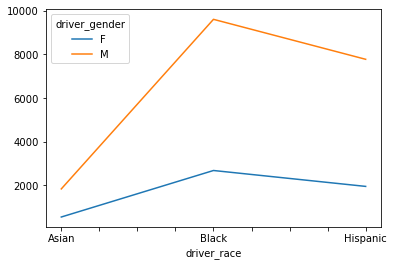

In [13]:
table.plot()
plt.show()

However, a line plot is not appropriate in this case because it implies a change in time along the x-axis, whereas the x-axis actually represents three distinct categories.

### Creating a bar plot
By specifying `kind='bar'`, you can create a bar plot, which is much more appropriate than a line plot for comparing categorical data.

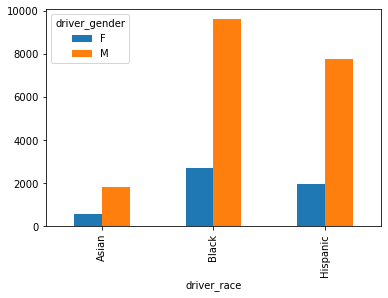

In [14]:
table.plot(kind='bar')
plt.show()

 With this plot, the numbers in our frequency table have been converted to bars for which the height represents the magnitude. Each gender has been assigned a color, and the two gender bars for each race are placed next to one another. The bar plot makes it especially easy to see the gender difference within each race. For all three races, we see that the number of males stopped is far greater than the number of females stopped.

### Stacking the bars
A variation of the bar plot is the stacked bar plot, which you can generate by adding the argument `stacked=True`.

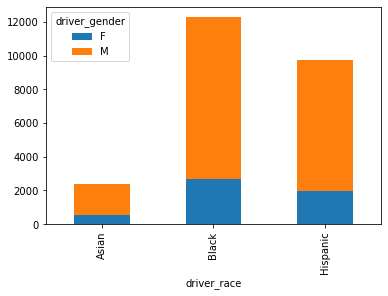

In [15]:
table.plot(kind='bar', stacked=True)
plt.show()

For each race, the two gender bars are now stacked on top of one another. 

The strength of this plot is that it helps you to see the total stops for each race, which was not as obvious when the bars were side-by-side. 

By emphasizing the totals, however, this plot slightly deemphasizes the individual components of each bar, and makes those components harder to compare against one another. 

Neither type of bar plot is right or wrong, rather you should choose the plot that best helps to answer the question you're asking.

## Tallying violations by district
The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the "K" zones, which you'll examine further in the next exercise.

- Create a frequency table from the `ri` DataFrame's `district` and `violation` columns using the `pd.crosstab()` function.
- Save the frequency table as a new object, `all_zones`.

In [16]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  


- Select rows `'Zone K1'` through `'Zone K3'` from `all_zones` using the `.loc[]` accessor.
- Save the smaller table as a new object, `k_zones`.

In [18]:
# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  


## Plotting violations by district
Now that you've created a frequency table focused on the "K" zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a bar plot, which is an appropriate plot type since you're comparing categorical data. Then you'll create a stacked bar plot in order to get a slightly different look at the data. Which plot do you find to be more insightful?

- Create a bar plot of `k_zones`.
- Display the plot and examine it. What do you notice about each of the zones?

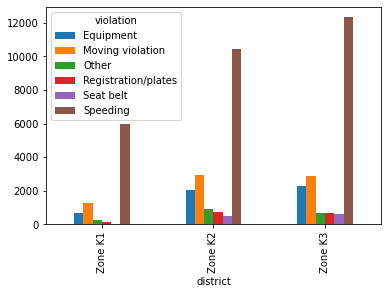

In [19]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

- Create a stacked bar plot of `k_zones`.
- Display the plot and examine it. Do you notice anything different about the data than you did previously?

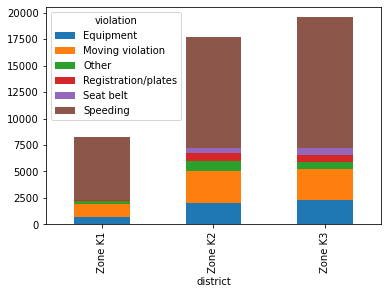

In [20]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

*The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.*

---
## How long might you be stopped for a violation?
In this section, we'll start by learning how to translate strings into data that can be analyzed numerically, and then we'll learn a few easy ways to improve our plots.

### Analyzing an object column
Let's return again to our DataFrame of Apple stock prices. 
```python
apple
```
```
date_and_time         price    volume  change
2018-01-08 16:00:00  174.34  20567800    down
...                     ...       ...     ...
2018-02-08 16:00:00  178.46  54390500      up
...
```

A new column called change has been added to the DataFrame. It indicates whether the stock price went up or down compared to the previous trading day. 

Let's pretend we wanted to calculate how often the price went up. 
- One way to do this would be to create a Boolean column that is `True` if the price went up, and `False` otherwise. 
- Then we could easily calculate how often the price went up by taking the mean of the Boolean column. 

But how would we create this column? The change column has the object data type because it contains strings, and previously we've used the `astype()` method to convert strings to numbers or Booleans. However, `astype()` only works when pandas can infer how the conversion should be done, and that's not the case here. We'll need to find a different technique.

### Mapping one set of values to another
When you need to map one set of values to another, you can use the Series `map()` method. You provide it with **a dictionary that maps the values you currently have to the values that you want**. 

In this case, we want to map "up" to `True` and "down" to `False`, so we'll create a dictionary called mapping that specifies this. 

Then, we'll use the `map()` method on the change column, pass it the `mapping` object, and store the result in a new column `called is_up`. When we print the DataFrame, you'll see that the `is_up` column contains `True` when the change column says up, and `False` when the change column says down. 

```python
mapping = {'up':True, 'down':False}
apple['is_up'] = apple.change.map(mapping)
apple
```
```
date_and_time         price    volume  change  is_up
2018-01-08 16:00:00  174.34  20567800    down  False
...                     ...       ...     ...    ...
2018-02-08 16:00:00  178.46  54390500      up   True
...
```

Now that we have a Boolean column, we can calculate how often the price went up by taking the `mean()` of that column. 
```python
apple.is_up.mean()
```
```
0.5
```
The answer is that it went up 50% of the time.

### Calculating the search rate
Now we're going to return to our DataFrame of traffic stops, and shift to a completely separate topic. 

Let's say that we wanted to visualize how often searches were performed after each type of violation. We would group by violation, and then take the `mean()` of `search_conducted`. 

In [21]:
ri.groupby('violation').search_conducted.mean()

violation
Equipment              0.064280
Moving violation       0.057014
Other                  0.045362
Registration/plates    0.093438
Seat belt              0.031513
Speeding               0.021560
Name: search_conducted, dtype: float64

This calculates the `search_rate` for each of the six violation types, and returns a Series that is sorted in alphabetical order by violation. We'll save this as an object named `search_rate`.

In [22]:
search_rate = ri.groupby('violation').search_conducted.mean()

### Creating a bar plot
To visualize the search rate, we'll create a bar plot since we're comparing the search rate across categories.

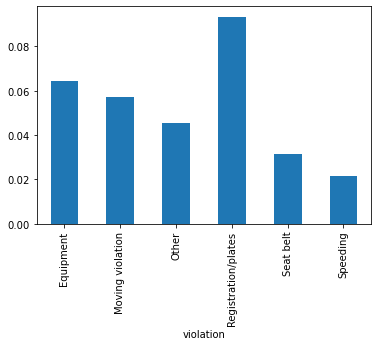

In [25]:
search_rate.plot(kind='bar')
plt.show()

The violations are displayed on the x-axis, and the search rate is on the y-axis. This plot looks okay, but there are two simple changes we can make that will make this plot more effective.

### Ordering the bars (1)
The first improvement we can make is to **order the bars from left to right by size**, which will make the plot easier to understand. All we need to do is to use the `sort_values()` method to sort the `search_rate` Series in ascending order.

In [26]:
search_rate.sort_values()

violation
Speeding               0.021560
Seat belt              0.031513
Other                  0.045362
Moving violation       0.057014
Equipment              0.064280
Registration/plates    0.093438
Name: search_conducted, dtype: float64

### Ordering the bars (2)
Then, when we call the plot method on the sorted data, the bars are now ordered.

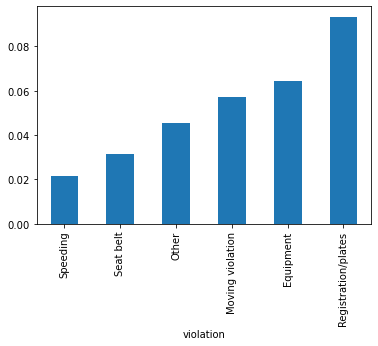

In [27]:
search_rate.sort_values().plot(kind='bar')
plt.show()

This makes it easy to see which violations have the highest and the lowest search rates.

### Rotating the bars
The second improvement we can make is to **change the kind argument from bar to `barh`, which will rotate the bars so that they're horizontal**. This makes it much easier to read the labels for each bar.

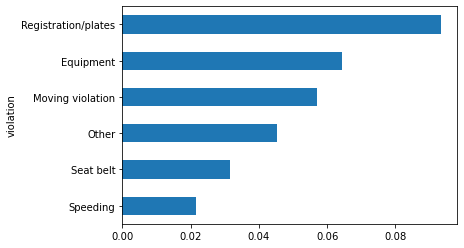

In [28]:
search_rate.sort_values().plot(kind='barh')
plt.show()

## Converting stop durations to numbers
In the traffic stops dataset, the `stop_duration` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as `'0-15 Min'`. How can you make this data easier to analyze?

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

  Convert `'0-15 Min'` to `8`

  Convert `'16-30 Min'` to `23`

  Convert `'30+ Min'` to `45`

- Print the unique values in the `stop_duration` column.

In [29]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

['0-15 Min' '16-30 Min' '30+ Min']


- Create a dictionary called `mapping` that maps the `stop_duration` strings to the integers specified above.
- Convert the `stop_duration` strings to integers using the `mapping`, and store the results in a new column called `stop_minutes`.
- Print the unique values in the `stop_minutes` column, to verify that the durations were properly converted to integers.

In [31]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min':23, '30+ Min': 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

[ 8 23 45]


## Plotting stop length
If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the `violation` column in this exercise, you'll use `violation_raw` since it contains more detailed descriptions of the violations.

- For each value in the `ri` DataFrame's `violation_raw` column, calculate the mean number of `stop_minutes` that a driver is detained.
- Save the resulting Series as a new object, `stop_length`.

In [32]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


- Sort `stop_length` by its values, and then visualize it using a horizontal bar plot.
- Display the plot.

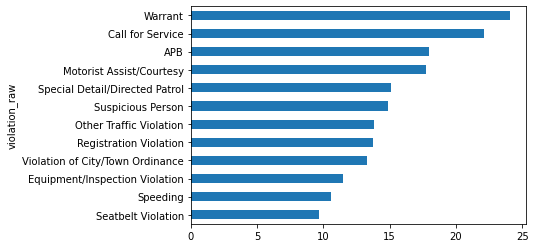

In [33]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()